### Text Analytics Coursework - MSc in Big Data Analytics
#### July 2022

###### Name: Ravidu Shehan Perera
###### IIT ID: 20211499
###### RGU ID: 2121901

### Answer (a)

Explain how data was collected...

Since i use google colabotary to run the code, i have to store all the files in the google colab and import the drive api

In [ ]:
from google.colab import drive
drive.mount('/gdrive')


Mounted at /gdrive


In [ ]:
from bs4 import BeautifulSoup as bs
import nltk
import re
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import numpy as np

nltk.download('punkt')
nltk.download('stopwords')

ps = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!pip install twitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 4.5 MB/s 


In [ ]:
import twitter
CONSUMER_KEY = 'Xw9mBbA8uulZw5rVxOkILUMBY'
CONSUMER_SECRET ='K84pNSNcu0EZXVorHAJUGkcGmLXu242GG9jI0Ag4d9kFzOOQjg'
OAUTH_TOKEN = '2905175149-sOOrdV1qbsTiRiJVDRixjms6PdTYZP5lTJdDSeo'
OAUTH_TOKEN_SECRET = 'lmMtG7zgU99MQsQpZ7RzfXphH25uOPRO4JCG6lzAeEEkX'

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                          CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

install the twitter and import. I define the consumer key, consumer secret key and related Oauth details to get the access for twitter_api

In [ ]:
sports_news =[]
twitter_handles=["TSN_Sports","SkySports","espn","Sportsnet","SlowSportsNews","BleacherReport","Deadspin","SkySportsNews","FOXSports","SkySportsBoxing","NBCSports","FOXSports","NBCSportsEdge","NBCSEdgeFB","NCAA","ESPNcricinfo","cnnsport"]
for screen_name in twitter_handles:
  next_tweet = twitter_api.statuses.user_timeline(screen_name=screen_name, count=200, tweet_mode="extended")
  sports_news.extend(next_tweet)
  last_tweet_id = sports_news[-1]['id'] - 1
  while len(next_tweet) > 0:
        next_tweet =  twitter_api.statuses.user_timeline(screen_name=screen_name, count=200, tweet_mode="extended", max_id= last_tweet_id)
        sports_news.extend(next_tweet)
        last_tweet_id = sports_news[-1]['id'] - 1
        sports_urls=[]
        for tweet in sports_news:
          if tweet['entities']['urls'] != []:
            sports_urls.append(tweet['entities']['urls'][0]['expanded_url'])

1. Defined the sports_news list to store tweets
2. Select some twitter accounts which has sports related news since user_timeline method is only fetching first 200 tweets
3. After getting 200 tweets using the last ID in the first retreival, id will save.
4. Data is repeatedlty collecting untill the API stops sending data
5. After that it will run through each screen name in the list to aquire tweets upto 10000+
6. URLs which are pointing to an articles will extract in the last for loop.

In [ ]:
len(sports_urls)

16255

In [ ]:
with open('/gdrive/My Drive/dataSet/sport_tweets.txt', 'a') as sports_data:
      for urldata in sports_urls:
        sports_data.write("%s\n" % urldata)

In [ ]:
with open('/gdrive/My Drive/dataSet/sport_tweets.txt') as sports_data:
  with open('/gdrive/My Drive/dataSet/sport_tweetsB.txt','a') as output:
    for line in sports_data:
      if not line.strip().startswith("None"):
        output.write(line)



Open the files and remove the missing urls from twitter profiles and save it into new file

In [ ]:
with open('/gdrive/My Drive/dataSet/sport_tweetsB.txt') as cnn_fileB:
    urlA = cnn_fileB.readlines()
    len(urlA)
    urls=urlA[0:30000]

urlsA = [line.strip() for line in urls]
len(urlsA)

30000

Open the File again and remove the whitespace characters like `\n` at the end of each line to web scrape

In [ ]:
from bs4 import BeautifulSoup
import requests

news_list=[]
counter = 0
for url in urlsA:
    counter += 1
    response = requests.get(url)
    html = response.content
    soup = BeautifulSoup(html)
    if soup.select('h1.pg-headline') == []:
        continue
    heading = soup.select('h1.pg-headline')[0].text.strip()
    content_divs = soup.findAll("div", {"class": "zn-body__paragraph"})
    content = ""
    i = 0
    for paragragh in content_divs:
        if i != 0:
            content += " "
        content += paragragh.text
        i += 1
    news_list.append([heading, content])

In [ ]:
len(news_list)

0

In [ ]:
import csv
with open("/gdrive/My Drive/dataSet/sport_urlF.csv","a",encoding='utf-8') as sports_csv:
    csvWriter = csv.writer(sports_csv,delimiter=',')
    csvWriter.writerow("Contents")
    csvWriter.writerows(news_list)

NameError: ignored

1. There were timeout errors while connecting tweets
2. Time consuming when collecting data

I create a duplicate file and did the data collection seperatly

### Answer (b)

In [ ]:

import pandas as pd
extracted_news= pd.read_csv("/gdrive/My Drive/dataSet/sport_urlF.csv")
extracted_news.head()

ParserError: ignored

In [ ]:
extracted_news.shape

NameError: ignored

There are 12404 news items in the dataset

In [ ]:
def words_details(text_data):
  word_count =0
  unique_words =[]
  for rows in text_data:
    word_count += len(str(rows))
    rowA =str(rows)
    for words in rowA:
      if words not in unique_words:
        unique_words.append(words)
  return word_count,len(unique_words)

word_count, unique_count = words_details(extracted_news['Content'])
print('Total words count ', word_count)
print('Unique words count ', unique_count)

Total words count  27276395
Unique words count  158


In [ ]:
def sentence_length(text_data):
  sentence_length =[]
  for sentence in text_data:
    for recs in sentence:
      wordtoken=tokenize(sentence)
      sentence_length.append(len(wordtoken))


sentence_data = sentence_length(extracted_news['Content'])




This dataset has 2 columns and 12404 columns

### Answer (c)

Describe how duplicates were identified...

In [ ]:
duplicated_values = extracted_news.Content.duplicated()
duplicated_count =  extracted_news.Content.duplicated().sum()
print('Duplicated values count', duplicated_count)

Duplicated values count 10279


In [ ]:
after_drop_dups = extracted_news.drop_duplicates()


Drop_duplicate() function used to drop all the duplicated values

In [ ]:

word_count, unique_count = words_details(after_drop_dups['Content'])
print('Total words count after duplicates', word_count)
print('Unique words count after duplicates ', unique_count)

Total words count after duplicates 7617990
Unique words count after duplicates  158


In [ ]:
after_drop_dups.shape

(4251, 2)

Eventhough we extracted 12404 data items, there are only 4251 data which are not duplicated

In [ ]:
to_clean_df =after_drop_dups
to_clean_df.shape

(4251, 2)

### Answer (d)

1. Clean the text for remove non alphanumeric numbers, escape characters and also remove the unneccesary html tags if there

In [ ]:
def clean_texts(texts):
    alpha_numerics = re.sub('[^A-Za-z0-9]+', ' ', str(texts))
    escape_char =re.compile(r'(\x9B|\x1B\[)[0-?]*[ -\/]*[@-~]')
    unescape = escape_char.sub('', alpha_numerics)
    remove_html_tags = bs(unescape).get_text()
    remove_html_tags = re.sub(r'http\S+', '', remove_html_tags)
    return remove_html_tags

to_clean_df['Non_alpha_numeric'] = to_clean_df['Content'].apply(lambda x: clean_texts(x))
to_clean_df.head()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Heading,Content,Non_alpha_numeric
0,Heading,Content,Content
1,Waving goodbye? Tearful Tiger Woods serenaded ...,The ovation soundtracked the entirety of the 1...,The ovation soundtracked the entirety of the 1...
2,Nearly 100 visa issues for athletes and offici...,"In total, 374 visa cases have been escalated t...",In total 374 visa cases have been escalated to...
3,Marlins shortstop gets tooth knocked out but M...,Marlins shortstop Miguel Rojas was hit square ...,Marlins shortstop Miguel Rojas was hit square ...
4,Hockey Canada apologizes; reopens investigatio...,"In an open letter posted Thursday, the organiz...",In an open letter posted Thursday the organiza...


Above method remove the alpha numeric charactors in the dataset and html tags and it will create a new column in to_clean_df and saved

2. Tokenize the sentences and store in new column in dataframe. Used the nltk.word_tokenize inbuilt function

In [ ]:
def tokenize(text):
    lower_case = text.lower()
    tokens = nltk.word_tokenize(lower_case)
    return tokens

to_clean_df['tokenized'] = to_clean_df['Non_alpha_numeric'].apply(lambda x: tokenize(x))
to_clean_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Heading,Content,Non_alpha_numeric,tokenized
0,Heading,Content,Content,[content]
1,Waving goodbye? Tearful Tiger Woods serenaded ...,The ovation soundtracked the entirety of the 1...,The ovation soundtracked the entirety of the 1...,"[the, ovation, soundtracked, the, entirety, of..."
2,Nearly 100 visa issues for athletes and offici...,"In total, 374 visa cases have been escalated t...",In total 374 visa cases have been escalated to...,"[in, total, 374, visa, cases, have, been, esca..."
3,Marlins shortstop gets tooth knocked out but M...,Marlins shortstop Miguel Rojas was hit square ...,Marlins shortstop Miguel Rojas was hit square ...,"[marlins, shortstop, miguel, rojas, was, hit, ..."
4,Hockey Canada apologizes; reopens investigatio...,"In an open letter posted Thursday, the organiz...",In an open letter posted Thursday the organiza...,"[in, an, open, letter, posted, thursday, the, ..."


In [ ]:
tokened_data= to_clean_df['tokenized']

def get_tokens_count(tokens):
    print('Total token count in the data set : ', sum([len(tokens) for tokens in tokens]))

    token_set = set()
    [[token_set.add(token) for token in tokens] for tokens in tokens]
    print('Total unique token count in data set : ', str(len(token_set)))

get_tokens_count(tokened_data)

Total token count in the data set :  1356952
Total unique token count in data set :  31879


Above method count the total token count in the data set and unique token count Stop word reomval is also did for the dataset

In [ ]:
def stop_words_removal(stop_words):
  word_list = nltk.corpus.stopwords.words('english')
  without_stop_words =[]
  for rec in stop_words:
    rec_without_sw = [token for token in rec if token not in word_list]
    without_stop_words.append(rec_without_sw)
  return without_stop_words

to_clean_df['Without_SW'] = stop_words_removal(to_clean_df['tokenized'])
to_clean_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Heading,Content,Non_alpha_numeric,tokenized,Without_SW
0,Heading,Content,Content,[content],[content]
1,Waving goodbye? Tearful Tiger Woods serenaded ...,The ovation soundtracked the entirety of the 1...,The ovation soundtracked the entirety of the 1...,"[the, ovation, soundtracked, the, entirety, of...","[ovation, soundtracked, entirety, 15, time, ma..."
2,Nearly 100 visa issues for athletes and offici...,"In total, 374 visa cases have been escalated t...",In total 374 visa cases have been escalated to...,"[in, total, 374, visa, cases, have, been, esca...","[total, 374, visa, cases, escalated, joint, gr..."
3,Marlins shortstop gets tooth knocked out but M...,Marlins shortstop Miguel Rojas was hit square ...,Marlins shortstop Miguel Rojas was hit square ...,"[marlins, shortstop, miguel, rojas, was, hit, ...","[marlins, shortstop, miguel, rojas, hit, squar..."
4,Hockey Canada apologizes; reopens investigatio...,"In an open letter posted Thursday, the organiz...",In an open letter posted Thursday the organiza...,"[in, an, open, letter, posted, thursday, the, ...","[open, letter, posted, thursday, organization,..."


Remove all the stop words in the file and ready the data frame to do the word stemming

In [ ]:
def word_stemming(data_set):
  stemed_data=[]
  combined_data=[]

  for tokens in data_set:
    stemming = [ps.stem(token) for token in tokens]
    stemed_data.append(stemming)
    stem_corpus = ' '.join(stemming)
    combined_data.append(stem_corpus)
  return stemed_data, combined_data

to_clean_df['stemed_data'], to_clean_df['Stemmed_sentences'] =word_stemming(to_clean_df['Without_SW'])
to_clean_df.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,Heading,Content,Non_alpha_numeric,tokenized,Without_SW,stemed_data,Stemmed_sentences
0,Heading,Content,Content,[content],[content],[content],content
1,Waving goodbye? Tearful Tiger Woods serenaded ...,The ovation soundtracked the entirety of the 1...,The ovation soundtracked the entirety of the 1...,"[the, ovation, soundtracked, the, entirety, of...","[ovation, soundtracked, entirety, 15, time, ma...","[ovat, soundtrack, entireti, 15, time, major, ...",ovat soundtrack entireti 15 time major winner ...
2,Nearly 100 visa issues for athletes and offici...,"In total, 374 visa cases have been escalated t...",In total 374 visa cases have been escalated to...,"[in, total, 374, visa, cases, have, been, esca...","[total, 374, visa, cases, escalated, joint, gr...","[total, 374, visa, case, escal, joint, group, ...",total 374 visa case escal joint group compris ...
3,Marlins shortstop gets tooth knocked out but M...,Marlins shortstop Miguel Rojas was hit square ...,Marlins shortstop Miguel Rojas was hit square ...,"[marlins, shortstop, miguel, rojas, was, hit, ...","[marlins, shortstop, miguel, rojas, hit, squar...","[marlin, shortstop, miguel, roja, hit, squar, ...",marlin shortstop miguel roja hit squar mouth o...
4,Hockey Canada apologizes; reopens investigatio...,"In an open letter posted Thursday, the organiz...",In an open letter posted Thursday the organiza...,"[in, an, open, letter, posted, thursday, the, ...","[open, letter, posted, thursday, organization,...","[open, letter, post, thursday, organ, said, re...",open letter post thursday organ said reopen in...


In [ ]:
to_clean_df.head()

,Heading,Content,Non_alpha_numeric,tokenized,Without_SW,stemed_data,Stemmed_sentences
0,Heading,Content,Content,[content],[content],[content],content
1,Waving goodbye? Tearful Tiger Woods serenaded ...,The ovation soundtracked the entirety of the 1...,The ovation soundtracked the entirety of the 1...,"[the, ovation, soundtracked, the, entirety, of...","[ovation, soundtracked, entirety, 15, time, ma...","[ovat, soundtrack, entireti, 15, time, major, ...",ovat soundtrack entireti 15 time major winner ...
2,Nearly 100 visa issues for athletes and offici...,"In total, 374 visa cases have been escalated t...",In total 374 visa cases have been escalated to...,"[in, total, 374, visa, cases, have, been, esca...","[total, 374, visa, cases, escalated, joint, gr...","[total, 374, visa, case, escal, joint, group, ...",total 374 visa case escal joint group compris ...
3,Marlins shortstop gets tooth knocked out but M...,Marlins shortstop Miguel Rojas was hit square ...,Marlins shortstop Miguel Rojas was hit square ...,"[marlins, shortstop, miguel, rojas, was, hit, ...","[marlins, shortstop, miguel, rojas, hit, squar...","[marlin, shortstop, miguel, roja, hit, squar, ...",marlin shortstop miguel roja hit squar mouth o...
4,Hockey Canada apologizes; reopens investigatio...,"In an open letter posted Thursday, the organiz...",In an open letter posted Thursday the organiza...,"[in, an, open, letter, posted, thursday, the, ...","[open, letter, posted, thursday, organization,...","[open, letter, post, thursday, organ, said, re...",open letter post thursday organ said reopen in...


Now you can see there are 8 columns with each data cleaning steps


In [ ]:

word_count, unique_count = words_details(to_clean_df['stemed_data'])
print('Total words count after Stemming', word_count)
print('Unique words count after Stemming ', unique_count)

Total words count after Stemming 6665816
Unique words count after Stemming  41


I define below file to save the above dataframe if neccessary

In [ ]:
#import csv

#with open("/gdrive/My Drive/dataSet/Final_Cleaned.csv","w",encoding='utf-8') as cnn_csv:
 #   csvWriter = csv.writer(cnn_csv,delimiter=',')
  #  csvWriter.writerow(["heading","content","Non Alpha","Tokenized","withoutSW","Stemed","Sentences"])
   # csvWriter.writerows(to_clean_df) */

### Answer (e)

For the feature extraction, I used Tf-idf and Word2vc method representing Sparse and dense.

In [ ]:

normalized_corpus=to_clean_df['Stemmed_sentences']
from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf_features_extractor(corpus, ngram_range=(1,1)):

    vectorizer = TfidfVectorizer(min_df=1,
                                 norm='l2',
                                 smooth_idf=True,
                                 use_idf=True,
                                 ngram_range=ngram_range)
    features = vectorizer.fit_transform(corpus)
    return vectorizer, features



tfidf_features_extractor function is defined to get the Tf-idf extracted features

In [ ]:
import pandas as pd

def display_features(features, feature_names):
    df = pd.DataFrame(data=features,
                      columns=feature_names)
    print(df)

In [ ]:

tfidf_vectorizer, tdidf_features = tfidf_features_extractor(normalized_corpus)
feature_names =tfidf_vectorizer.get_feature_names()
display_features(np.round(tdidf_features.todense(), 2), feature_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


       00   000  000km  000m  000th  001  002  003  007  00am  ...  zsovic  \
0     0.0  0.00    0.0   0.0    0.0  0.0  0.0  0.0  0.0   0.0  ...     0.0   
1     0.0  0.03    0.0   0.0    0.0  0.0  0.0  0.0  0.0   0.0  ...     0.0   
2     0.0  0.00    0.0   0.0    0.0  0.0  0.0  0.0  0.0   0.0  ...     0.0   
3     0.0  0.00    0.0   0.0    0.0  0.0  0.0  0.0  0.0   0.0  ...     0.0   
4     0.0  0.00    0.0   0.0    0.0  0.0  0.0  0.0  0.0   0.0  ...     0.0   
...   ...   ...    ...   ...    ...  ...  ...  ...  ...   ...  ...     ...   
4246  0.0  0.00    0.0   0.0    0.0  0.0  0.0  0.0  0.0   0.0  ...     0.0   
4247  0.0  0.00    0.0   0.0    0.0  0.0  0.0  0.0  0.0   0.0  ...     0.0   
4248  0.0  0.00    0.0   0.0    0.0  0.0  0.0  0.0  0.0   0.0  ...     0.0   
4249  0.0  0.00    0.0   0.0    0.0  0.0  0.0  0.0  0.0   0.0  ...     0.0   
4250  0.0  0.00    0.0   0.0    0.0  0.0  0.0  0.0  0.0   0.0  ...     0.0   

      zuber  zuerlein  zulfiya  zumretay  zurich  zverev  zwaye

In [ ]:
tdidf_features.shape

(4251, 22117)

There are 22117 features identified using TF-Idf

In [ ]:
print(feature_names)

['00', '000', '000km', '000m', '000th', '001', '002', '003', '007', '00am', '01', '016', '017', '02', '023', '03', '030th', '033', '035', '039th', '04', '041', '05', '050', '051', '06', '07', '075', '076', '079', '08', '080', '0808', '081', '082', '085', '088', '089', '09', '090', '094', '098', '10', '100', '1000', '100kg', '100m', '100th', '100x100', '101', '102', '102nd', '103', '103rd', '104', '104th', '105', '105th', '106', '106th', '107', '108', '1080', '108th', '109', '109f', '10k', '10km', '10m', '10th', '11', '110', '111', '111th', '112', '112th', '113', '114', '115', '115th', '116', '117', '118', '119', '11m', '11th', '11tth', '12', '120', '120kg', '120lb', '120m', '120th', '121', '121st', '122', '122nd', '123', '124', '125', '125kg', '125th', '126', '1260', '126m', '126th', '127', '128', '129', '12m', '12th', '13', '130', '130m', '130th', '131', '1314', '131st', '132', '132nd', '133', '1336', '133c', '134', '135', '136', '136th', '137', '137th', '138', '138m', '139', '13km', 

Get the Features using Word2Vec , word embedding

In [ ]:
def word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    for word in words:
        if word in vocabulary:
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model[word])
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)

    return feature_vector

In [ ]:
def Avg_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.index_to_key)
    features = [word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

In [ ]:
!pip3 install gensim==4.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gensim
import nltk
print(gensim.__version__)


4.1.2


In [ ]:
tokenized_content = [nltk.word_tokenize(sentence)
                    for sentence in str(to_clean_df['Content'])]


In [ ]:
model_w2vec = gensim.models.Word2Vec(tokenized_content,
                               vector_size=10,
                               window=10,
                               min_count=2,
                               sample=1e-3)


In [ ]:
avg_word_vec_features = Avg_word_vectorizer(corpus=tokenized_content,
                                                 model=model_w2vec.wv,
                                                 num_features=10)
print(np.round(avg_word_vec_features, 3))

[[ 0.     0.     0.    ...  0.     0.     0.   ]
 [ 0.     0.     0.    ...  0.     0.     0.   ]
 [ 0.     0.     0.    ...  0.     0.     0.   ]
 ...
 [-0.005  0.002  0.051 ...  0.09  -0.05  -0.038]
 [ 0.011 -0.016  0.022 ... -0.024 -0.095  0.045]
 [ 0.074 -0.015 -0.045 ...  0.01  -0.083 -0.094]]


Above figure shows the features after word embedding

### Answer (f)



In general, lustering is a form of "unsupervised learning." This implies that we lack a target variable. We're merely waiting for the data's patterns to become more obvious.

In [ ]:
from sklearn.cluster import KMeans
def k_means_Algo(feature_matrix, number_of_clusters):
    km = KMeans(n_clusters=number_of_clusters,max_iter=10000)
    predict=km.fit_predict(feature_matrix)
    clusters = km.labels_
    return km, clusters, predict

Get the silhouette score with relevant cluster. If Silhouette score is 1, the  data point is very compact within the cluster to which it belongs and far away from the other clusters. The worst value is -1. Values near 0 denote overlapping clusters

In [ ]:
from sklearn.metrics import silhouette_score
sum_of_sqrd_distance = []
k_rng = range(2,10)
for k in k_rng:
  km,clusters,predict = k_means_Algo(tdidf_features, k)
  sum_of_sqrd_distance.append(km.inertia_)

  score = silhouette_score(tdidf_features, predict)
  print("Cluster count = {}, silhouette score is {})".format(k, score))

Cluster count = 2, silhouette score is 0.5157166579715449)
Cluster count = 3, silhouette score is 0.5042786877032908)
Cluster count = 4, silhouette score is 0.5051057094428614)
Cluster count = 5, silhouette score is 0.5069390358917322)
Cluster count = 6, silhouette score is 0.5079745935314101)
Cluster count = 7, silhouette score is 0.5098275807942133)
Cluster count = 8, silhouette score is 0.5109771978982458)
Cluster count = 9, silhouette score is 0.5115080777219742)


Since we dont know the K value, we define a range of k values

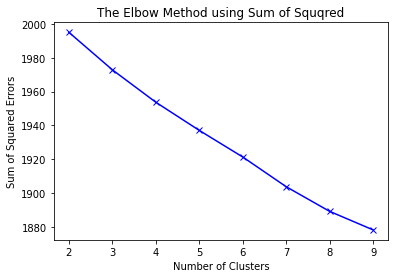

In [ ]:
plt.plot(k_rng, sum_of_sqrd_distance, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors')
plt.title('The Elbow Method using Sum of Squqred')
plt.show()

The elbow approach applies k-means clustering on the dataset for a variety of values of k, then computes the average score for each value of k for each cluster. By default, the distortion score—the sum of the square distances between each point and the center to which it is assigned—is calculated. Other metrics, such as the silhouette score, which computes the ratio of dispersion between and within clusters, the mean silhouette coefficient for all samples, or the calinski harabasz score, can also be employed. After considering all the factes, we too the elbow values is 8 for the given dataset. Therefore assume there are 8 clusters

In [ ]:
no_clusters = 8
model = KMeans(n_clusters = no_clusters, max_iter = 10000, random_state=100)
model.fit(tdidf_features)
label=model.predict(tdidf_features)
to_clean_df['label'] = label

to_clean_df.head(300)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Heading,Content,Non_alpha_numeric,tokenized,Without_SW,stemed_data,Stemmed_sentences,label
0,Heading,Content,Content,[content],[content],[content],content,4
1,Waving goodbye? Tearful Tiger Woods serenaded ...,The ovation soundtracked the entirety of the 1...,The ovation soundtracked the entirety of the 1...,"[the, ovation, soundtracked, the, entirety, of...","[ovation, soundtracked, entirety, 15, time, ma...","[ovat, soundtrack, entireti, 15, time, major, ...",ovat soundtrack entireti 15 time major winner ...,3
2,Nearly 100 visa issues for athletes and offici...,"In total, 374 visa cases have been escalated t...",In total 374 visa cases have been escalated to...,"[in, total, 374, visa, cases, have, been, esca...","[total, 374, visa, cases, escalated, joint, gr...","[total, 374, visa, case, escal, joint, group, ...",total 374 visa case escal joint group compris ...,2
3,Marlins shortstop gets tooth knocked out but M...,Marlins shortstop Miguel Rojas was hit square ...,Marlins shortstop Miguel Rojas was hit square ...,"[marlins, shortstop, miguel, rojas, was, hit, ...","[marlins, shortstop, miguel, rojas, hit, squar...","[marlin, shortstop, miguel, roja, hit, squar, ...",marlin shortstop miguel roja hit squar mouth o...,4
4,Hockey Canada apologizes; reopens investigatio...,"In an open letter posted Thursday, the organiz...",In an open letter posted Thursday the organiza...,"[in, an, open, letter, posted, thursday, the, ...","[open, letter, posted, thursday, organization,...","[open, letter, post, thursday, organ, said, re...",open letter post thursday organ said reopen in...,4
...,...,...,...,...,...,...,...,...
295,International Skating Union proposes raising m...,Under proposals listed in the agenda for its 5...,Under proposals listed in the agenda for its 5...,"[under, proposals, listed, in, the, agenda, fo...","[proposals, listed, agenda, 58th, congress, th...","[propos, list, agenda, 58th, congress, thailan...",propos list agenda 58th congress thailand next...,2
296,UEFA bans Russian football clubs from all comp...,"Portugal, initially defeated by Russia in a pl...",Portugal initially defeated by Russia in a pla...,"[portugal, initially, defeated, by, russia, in...","[portugal, initially, defeated, russia, playof...","[portug, initi, defeat, russia, playoff, repla...",portug initi defeat russia playoff replac coun...,4
297,Jon Rahm holds his nerve to win 'stressful' Me...,Having not won a PGA Tour event since the U.S....,Having not won a PGA Tour event since the U S ...,"[having, not, won, a, pga, tour, event, since,...","[pga, tour, event, since, u, open, last, summe...","[pga, tour, event, sinc, u, open, last, summer...",pga tour event sinc u open last summer spaniar...,3
298,Golden State Warriors overcome Draymond Green ...,The Warriors had to play the whole second half...,The Warriors had to play the whole second half...,"[the, warriors, had, to, play, the, whole, sec...","[warriors, play, whole, second, half, without,...","[warrior, play, whole, second, half, without, ...",warrior play whole second half without green e...,6


Below two code cells used to keep data to anonating purpose

In [ ]:
##df = pd.DataFrame(to_clean_df, columns = ['Content','label'])
#df=df.sample(n=400)
#len(df)

In [ ]:
#import csv
#df.to_csv("/gdrive/My Drive/dataSet/Anonated_file.csv")


Cluster representation using Word cloud

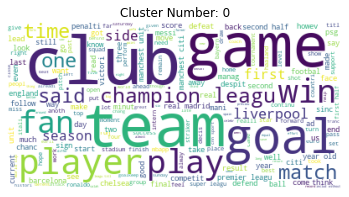

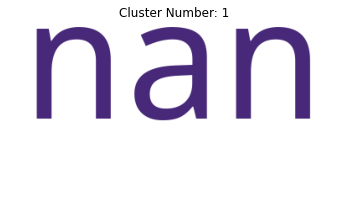

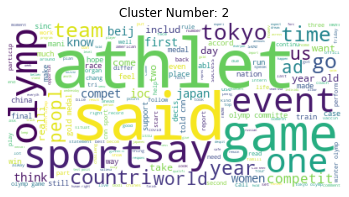

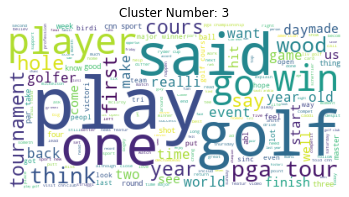

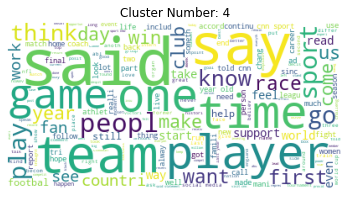

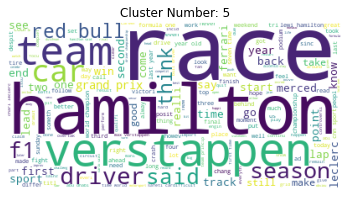

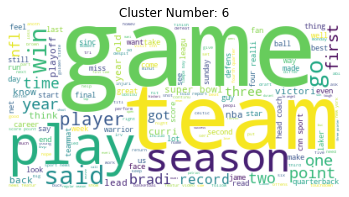

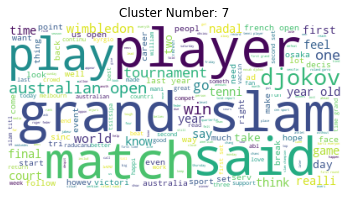

In [ ]:
from wordcloud import WordCloud
for k in range(0,no_clusters):
  df_lables = to_clean_df[to_clean_df.label == k]
  wordcloud = WordCloud(background_color="white",random_state = 1234).generate(' '.join([i for i in df_lables['Stemmed_sentences']]))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.title('Cluster Number: {}'.format(k))
  plt.show()


Wordcloud is used to represent the cluster results.

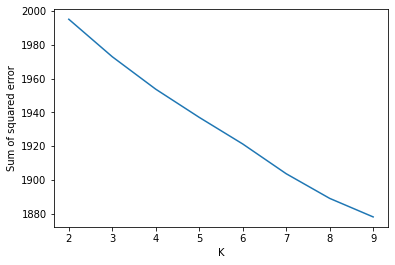

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sum_of_sqrd_distance)

In [ ]:
from sklearn.model_selection import train_test_split
def prepare_datasets(corpus, labels):
    train_X, test_X, train_Y, test_Y = train_test_split(corpus, labels,
                                                        test_size=300, random_state=42)
    return train_X, test_X, train_Y, test_Y

Split data into train and test. I assigned 300 value for testing

In [ ]:

train_corpus, test_corpus, train_labels, test_labels = prepare_datasets(normalized_corpus,
                                                                        predict)

In [ ]:
print('Train Corpus:',len(train_corpus))
print('Test Corpus:', len(test_corpus))
print('Train Labels :',len(train_labels))
print('Test Labels : ', len(test_labels))

Train Corpus: 3951
Test Corpus: 300
Train Labels : 3951
Test Labels :  300


Get_metrics method defined to get the evaluation metrcs for model. I will calculate the Accuracy, Precision, Recall and F1 score for the model

In [ ]:
from sklearn import metrics
def get_metrics(true_labels, predicted_labels):
    print('Accuracy:', np.round(metrics.accuracy_score(true_labels, predicted_labels),2))
    print('Precision:', np.round(metrics.precision_score(true_labels, predicted_labels,average='weighted'),2))
    print('Recall:', np.round(metrics.recall_score(true_labels,predicted_labels,average='weighted'),2))
    print('F1 Score:', np.round(metrics.f1_score(true_labels,predicted_labels,average='weighted'),2))

In [ ]:
def Evaluation_model(classifier,train_features, train_labels, test_features, test_labels):
    # build model
    #Use classifier to fit the data . this classifier can be anything in ML
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features)
    # evaluate model prediction performance
    get_metrics(true_labels=test_labels,
                predicted_labels=predictions)
    return predictions

Setup TF-IDF with train and test data to test the model

In [ ]:
tfidf_vectorizer, tfidf_train_features = tfidf_features_extractor(train_corpus)
tfidf_test_features = tfidf_vectorizer.transform(test_corpus)

Create the Word2Vector model

In [ ]:
# tokenize documents before creating the word2Vec model
tokenized_train = [nltk.word_tokenize(text)
                   for text in train_corpus]
tokenized_test = [nltk.word_tokenize(text)
                   for text in test_corpus]



In [ ]:
# build word2vec model
model_w2vec = gensim.models.Word2Vec(tokenized_train,
                               vector_size=500,
                               window=100,
                               min_count=30,
                               sample=1e-3)

In [ ]:
# averaged word vector features
w2vec_train_features = Avg_word_vectorizer(corpus=tokenized_train,
                                                 model=model_w2vec.wv,
                                                 num_features=500)
w2vec_test_features = Avg_word_vectorizer(corpus=tokenized_test,
                                                model=model_w2vec.wv,
                                                num_features=500)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
#I Chose multinomial Naive Bayes and Support vector machine algorithems to test the model
mnb = MultinomialNB()
svm = SGDClassifier(loss='hinge', max_iter=100)

1. Multinomial Naive Bayes : Natural Language Processing uses the Multinomial Naive Bayes algorithm as a probabilistic learning technique most frequently (NLP). The method, which guesses the tag of a text such as an email or newspaper article, is based on the Bayes theorem. For a given sample, it determines the probabilities of each tag, and then outputs the tag with the highest probability.

2. Support Vector Machine : Support vector machines is an algorithm that determines the best decision boundary between vectors that belong to a given group (or category) and vectors that do not belong to it. It can be applied to any kind of vectors which encode any kind of data.




For brief texts like tweets, NB produces good results. Using feature selection, NB may be able to outperform other classifiers for particular datasets. When it comes to non-linear classification jobs, SVM is more effective. In high dimensional spaces, such as those corresponding to literature, SVM generalizes well.

In [ ]:
# Multinomial Naive Bayes with tfidf features
Multinomail_predictions = Evaluation_model(classifier=mnb,
                                           train_features=tfidf_train_features,
                                           train_labels=train_labels,
                                           test_features=tfidf_test_features,
                                           test_labels=test_labels)

Accuracy: 0.74
Precision: 0.82
Recall: 0.74
F1 Score: 0.72


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Support Vector Machine with tfidf features
svm_predictions = Evaluation_model(classifier=svm,
                                           train_features=tfidf_train_features,
                                           train_labels=train_labels,
                                           test_features=tfidf_test_features,
                                           test_labels=test_labels)

Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98


In [ ]:
# Support Vector Machine with  word vector features
svm_w2vec = Evaluation_model(classifier=svm,
                                           train_features=w2vec_train_features,
                                           train_labels=train_labels,
                                           test_features=w2vec_test_features,
                                           test_labels=test_labels)


Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1 Score: 0.96


So comparing both values, SVM model has the high accuracy level.

**I chose TF-IDF extraction for going forward in this text analysing.The Word embedding method made use of only the first 20 words while the TF-IDF method made use of all available words. Therefore the TF-IDF method gained more information from longer documents compared to the embedding method.**

### Answer (g)



Load the annonated data file

In [ ]:
import pandas as pd
Anonated_file= pd.read_csv("/gdrive/My Drive/dataSet/Anonated_fileA.csv")
Anonated_file.head()

,Unnamed: 0,Content,label
0,2676,"A police statement on the arrests, which did n...",Cricket
1,2548,Speaking ahead of the Warriors' game against t...,Cricket
2,586,"Suspended 122 feet above the field, the 120-ya...",Cricket
3,2560,Lin was speaking to CNN's Anderson Cooper foll...,Cricket
4,161,Rafael Nadal claimed a record-extending 14th t...,Tennis


Pre processing the data

In [ ]:
Anonated_file['Remove_Alphanumeric'] = Anonated_file['Content'].apply(lambda x: clean_texts(x))
Anonated_file['Tokenized']= Anonated_file['Remove_Alphanumeric'].apply(lambda x: tokenize(x))
Anonated_file['Without_Stopword'] =stop_words_removal(Anonated_file['Tokenized'])
Anonated_file['Stemmed'],Anonated_file['Stemmed_sentences'] =word_stemming(Anonated_file['Without_Stopword'])
Anonated_file.head()

,Unnamed: 0,Content,label,Remove_Alphanumeric,Tokenized,Without_Stopword,Stemmed,Stemmed_sentences
0,2676,"A police statement on the arrests, which did n...",Cricket,A police statement on the arrests which did no...,"[a, police, statement, on, the, arrests, which...","[police, statement, arrests, name, miller, 45,...","[polic, statement, arrest, name, miller, 45, s...",polic statement arrest name miller 45 said det...
1,2548,Speaking ahead of the Warriors' game against t...,Cricket,Speaking ahead of the Warriors game against th...,"[speaking, ahead, of, the, warriors, game, aga...","[speaking, ahead, warriors, game, philadelphia...","[speak, ahead, warrior, game, philadelphia, 76...",speak ahead warrior game philadelphia 76er tue...
2,586,"Suspended 122 feet above the field, the 120-ya...",Cricket,Suspended 122 feet above the field the 120 yar...,"[suspended, 122, feet, above, the, field, the,...","[suspended, 122, feet, field, 120, yard, long,...","[suspend, 122, feet, field, 120, yard, long, o...",suspend 122 feet field 120 yard long oval shap...
3,2560,Lin was speaking to CNN's Anderson Cooper foll...,Cricket,Lin was speaking to CNN s Anderson Cooper foll...,"[lin, was, speaking, to, cnn, s, anderson, coo...","[lin, speaking, cnn, anderson, cooper, followi...","[lin, speak, cnn, anderson, cooper, follow, ki...",lin speak cnn anderson cooper follow kill eigh...
4,161,Rafael Nadal claimed a record-extending 14th t...,Tennis,Rafael Nadal claimed a record extending 14th t...,"[rafael, nadal, claimed, a, record, extending,...","[rafael, nadal, claimed, record, extending, 14...","[rafael, nadal, claim, record, extend, 14th, t...",rafael nadal claim record extend 14th titl fre...


In [ ]:
Anonated_file.shape

(400, 8)

In [ ]:
final_df = Anonated_file.drop(range(200,300))
final_df.shape

(300, 8)

Get only 300 values

In [ ]:
tfidf_vectorizer2, tdidf_features2 = tfidf_features_extractor(normalized_corpus)

Anonated_tfidf = tfidf_vectorizer2.transform(final_df['Stemmed_sentences']).toarray()
final_df['TestLabel'] = model.predict(Anonated_tfidf)


In [ ]:
final_df['TestLabel'].value_counts()

4    102
3     42
6     39
2     39
0     37
7     32
5      9
Name: TestLabel, dtype: int64

In [ ]:
countDict = {'Cricket': 0, 'Football': 0, 'Athletics': 0, 'Tennis': 0, 'Soccer': 0, 'Basketball': 0, 'Golf': 0,'Racing' :0}

Add labels in to dict

In [ ]:
def count_labels(corpus):
    for row in corpus:
      for key in countDict:
        if key in row:
          countDict[key] += 1

count_labels(final_df['label'])

In [ ]:
countDict

In [ ]:
labelDicts ={0:'Cricket',1: 'Football',2: 'Athletics',5: 'Tennis', 4:'Soccer',6: 'Basketball', 3:'Golf',7:'Racing'}
def get_category_from_label(num):
  return labelDicts[num]

final_df['category'] = final_df['TestLabel'].apply(lambda x: get_category_from_label(x))

Get the label categorization

In [ ]:
def evaluate(test, cat):
  correct = 0
  incorrect = 0
  for a,b in zip(test, cat) :
    if b in a:
      correct += 1
    else:
      incorrect += 1
  return correct, incorrect


accuratePred, inaccuratePred = evaluate(final_df['label'], final_df['category'])

print(accuratePred, inaccuratePred)
model_accuracy = (accuratePred/(accuratePred + inaccuratePred))*100
print("Model Accuracy is : ", model_accuracy)

105 195
Model Accuracy is :  35.0


In [ ]:
get_metrics(final_df['label'],final_df['category'])

Accuracy: 0.35
Precision: 0.34
Recall: 0.35
F1 Score: 0.34


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confirm the accuracy value by using previously build method

As in above two methods, expected accuracy is 35. WHich means predicted values not equal to the ground truth

### Answer (h)

Provide the reasoning for the 3 algorithms used...

In [ ]:
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

Below code use to display the inbalancing in the identified classes.

Class= 4, percentage= 18.87%
Class= 3, percentage= 5.74%
Class= 2, percentage= 5.88%
Class= 6, percentage= 6.05%
Class= 0, percentage= 5.29%
Class= 7, percentage= 6.40%
Class= 5, percentage= 1.74%
Class= 1, percentage= 50.04%


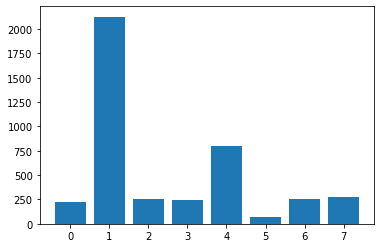

In [ ]:
y_label = LabelEncoder().fit_transform(to_clean_df['label'] )

counter = Counter(y_label)

for cl,val in counter.items():
    percentage = val / len(y_label) * 100
    print('Class= %d, percentage= %.2f%%' % (cl, percentage))

plt.bar(counter.keys(), counter.values())
plt.show()

To normalize the deviations following steps are taken, First, i did the vectorization with better ngram range and maximize the feature level

In [ ]:
tfVectorizer2 = TfidfVectorizer(max_features = 5000, ngram_range = (1,3))
tfTransformed2 = tfVectorizer2.fit_transform(to_clean_df['Stemmed_sentences']).toarray()

In [ ]:
x_corpus_2 = tfTransformed2

y_label_2 = LabelEncoder().fit_transform(to_clean_df['label'])

In [ ]:
oversample = SMOTE()
X, Y = oversample.fit_resample(x_corpus_2, y_label_2)

SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them. SMOTE synthesises new minority instances between existing minority instances

Class= 4, percentage= 50.04%
Class= 3, percentage= 50.04%
Class= 2, percentage= 50.04%
Class= 6, percentage= 50.04%
Class= 0, percentage= 50.04%
Class= 7, percentage= 50.04%
Class= 5, percentage= 50.04%
Class= 1, percentage= 50.04%


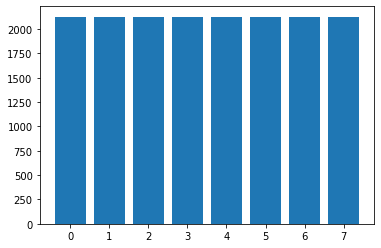

In [ ]:
counter = Counter(Y)
for cl,val in counter.items():
    percentage = val / len(y_label) * 100
    print('Class= %d, percentage= %.2f%%' % (cl, percentage))

plt.bar(counter.keys(), counter.values())
plt.show()

In [ ]:
train_corpusA, test_corpusA, train_labelsA, test_labelsA = prepare_datasets(to_clean_df['Stemmed_sentences'],
                                                                        to_clean_df['label'])

In [ ]:
tfidf_vectorizer_Balanced, tfidf_train_features_Balanced = tfidf_features_extractor(train_corpusA)
tfidf_test_features_Balanced = tfidf_vectorizer_Balanced.transform(test_corpusA)

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

rfc=RandomForestClassifier()
knn = KNeighborsClassifier()
reg = LogisticRegression()

Random Forest classifier :  random forest is a collection of decision trees. It is a common type of ensemble methods which aggregate results from multiple predictors. Random forest additionally utilizes bagging technique that allows each tree trained on a random sampling of original dataset and takes the majority vote from trees. Compared to decision tree, it has better generalization but less interpretable, because of more layers added to the model.

In [ ]:
RandomForest_predictions = Evaluation_model(classifier=rfc,
                                           train_features=tfidf_train_features_Balanced,
                                           train_labels=train_labelsA,
                                           test_features=tfidf_test_features_Balanced,
                                           test_labels=test_labelsA)

Accuracy: 0.92
Precision: 0.95
Recall: 0.92
F1 Score: 0.92


KNN Clasifier : In case of KNN classification, a majority voting is applied over the k nearest datapoints whereas, in KNN regression, mean of k nearest datapoints is calculated as the output. As a rule of thumb, we selects odd numbers as k. KNN is a lazy learning model where the computations happens only runtime

In [ ]:
KNN_predictions = Evaluation_model(classifier=knn,
                                           train_features=tfidf_train_features_Balanced,
                                           train_labels=train_labelsA,
                                           test_features=tfidf_test_features_Balanced,
                                           test_labels=test_labelsA)

Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93


Logistic regression : Logistics regression uses sigmoid function above to return the probability of a label. It is widely used when the classification problem is binary — true or false, win or lose, positive or negativ

In [ ]:
Logistic_predictions = Evaluation_model(classifier=reg,
                                           train_features=tfidf_train_features_Balanced,
                                           train_labels=train_labelsA,
                                           test_features=tfidf_test_features_Balanced,
                                           test_labels=test_labelsA)

Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97


If you can see, Logistic model achive the highest accuracy among all ather machine learning classifiers

### Answer (i)

Explain the 2 deep learning algorithms used...

In [ ]:
len(normalized_corpus)

4251

In [ ]:
word_count, unique_count = words_details(normalized_corpus)
print('Total words count after Stemming', word_count)
print('Unique words count after Stemming ', unique_count)

Total words count after Stemming 4468909
Unique words count after Stemming  37


In [ ]:
for_deepL = pd.DataFrame(
    {'Corpus': normalized_corpus,
     'Label': predict
    })
for_deepL.head()

,Corpus,Label
0,content,4
1,ovat soundtrack entireti 15 time major winner ...,1
2,total 374 visa case escal joint group compris ...,3
3,marlin shortstop miguel roja hit squar mouth o...,4
4,open letter post thursday organ said reopen in...,4


Visualizing the label data

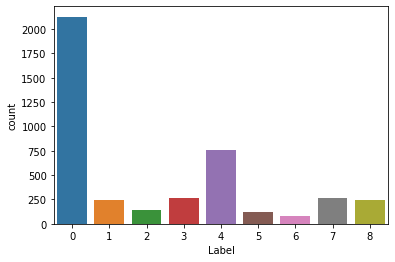

In [ ]:
import seaborn as sns
sns.countplot(x = 'Label', data = for_deepL)

Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split
corpus_train, corpus_test, y_train, y_test = train_test_split(
        normalized_corpus, predict, test_size=300, random_state=1000)

Get the keras Tokenizer for tokenizing the data

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(normalized_corpus)

X_train = tokenizer.texts_to_sequences(corpus_train)
X_test = tokenizer.texts_to_sequences(corpus_test)

vocab_size = len(tokenizer.word_index) + 1

print(normalized_corpus[2])
print(X_train[2])

total 374 visa case escal joint group compris unit state olymp paralymp committe usopc oregon22 world athlet spokesperson said 255 case far resolv 99 case still unresolv first time world athlet championship held us signific track field competit held countri sinc 1996 olymp atlanta former us sprinter four time olymp champion michael johnson said situat ridicul read irish sprinter deni entri commonwealth game known us entri visa may one difficult wa world athlet organ committe get ahead wrote twitter seb coe max siegel said world champ opportun grow sport us gave strategi johnson ad later tweet said work strategi execut beforehand insur step 1 champ succeed like insur peopl get visa notori difficult process kenya ferdinand omanyala set african 100m record 9 77 second last year third quickest man world season one high profil name experi visa issu 26 year old fortun eventu issu resolv accord bbc arriv eugen oregon less three hour men 100m heat begin friday
[122, 4, 128, 199, 16, 132, 96, 2

Padding sequence is used to get the all the data to same array size

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 5000

X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
X_test = pad_sequences(X_test, padding='post', maxlen=max_len)

Use of CNN model

In a neural network, neurons receive inputs, analyze their weighted sum, process it through an activation function, and then send the output to the following neuron. Due to the fact that it processes a variety of inputs, a convolutional neural network differs from a neural network. Each layer searches the data for patterns or helpful information.

When using Naive Bayes and KNN, we used to represent our text as a vector and run the algorithm on that vector. However, we now realize that we need to take into account how similar words are in various reviews in order to view the review as a whole rather than just the impact of each individual word.

We make use of a pre-made word embedding from the library. In general, there are many different embeddings accessible open-source, such as Glove and Word2Vec, if the data is not embedded.

In [ ]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.preprocessing import sequence
from keras.models import Sequential

In [ ]:
from keras.layers import Embedding

In [ ]:
# Building the CNN Model
model = Sequential()
 # initilaizing the Sequential nature for CNN model
# Adding the embedding layer which will take in maximum of 450 words as input and provide a 32 dimensional output of those words which belong in the top_words dictionary
model.add(Embedding(word_count, 32, input_length=max_len))
model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5000, 32)          213306112 
                                                                 
 conv1d (Conv1D)             (None, 5000, 32)          3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2500, 32)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 80000)             0         
                                                                 
 dense (Dense)               (None, 250)               20000250  
                                                                 
 dense_1 (Dense)             (None, 1)                 251       
                                                      

In [ ]:
# Fitting the data onto model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=128, verbose=2)
# Getting score metrics from our model
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
31/31 - 135s - loss: -3.5318e+05 - accuracy: 0.5037 - val_loss: -8.5690e+05 - val_accuracy: 0.4567 - 135s/epoch - 4s/step
Epoch 2/20
31/31 - 128s - loss: -1.7076e+06 - accuracy: 0.5037 - val_loss: -3.4064e+06 - val_accuracy: 0.4567 - 128s/epoch - 4s/step
Epoch 3/20
31/31 - 127s - loss: -5.6528e+06 - accuracy: 0.5037 - val_loss: -1.0032e+07 - val_accuracy: 0.4567 - 127s/epoch - 4s/step
Epoch 4/20
31/31 - 126s - loss: -1.4664e+07 - accuracy: 0.5037 - val_loss: -2.4075e+07 - val_accuracy: 0.4567 - 126s/epoch - 4s/step
Epoch 5/20
31/31 - 130s - loss: -3.2352e+07 - accuracy: 0.5037 - val_loss: -4.9784e+07 - val_accuracy: 0.4567 - 130s/epoch - 4s/step
Epoch 6/20
31/31 - 128s - loss: -6.3092e+07 - accuracy: 0.5037 - val_loss: -9.2656e+07 - val_accuracy: 0.4567 - 128s/epoch - 4s/step
Epoch 7/20
31/31 - 130s - loss: -1.1279e+08 - accuracy: 0.5037 - val_loss: -1.5927e+08 - val_accuracy: 0.4567 - 130s/epoch - 4s/step
Epoch 8/20
31/31 - 126s - loss: -1.8692e+08 - accuracy: 0.5037 - val_

Accuracy is mid range for the CNN model.

Use of RNN

RNNs, also known as recurrent neural networks, are a well-known supervised deep learning technique. Convolutional and artificial neural networks are two additional types of Deep Learning neural networks that are frequently employed. Deep Learning's primary objective is to replicate brain function in a machine. As a result, each neural network structure roughly represents a particular area of the brain.

In [ ]:
import tensorflow as tf

In [ ]:
rnn_model =Sequential()
#Embedding layer
rnn_model.add(tf.keras.layers.Embedding(word_count, 32, input_shape=(X_train.shape[1],)))
#Add LSTM layer
rnn_model.add(tf.keras.layers.LSTM(units=128, activation='tanh'))
#output Layer
rnn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
rnn_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
rnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5000, 32)          143005088 
                                                                 
 lstm (LSTM)                 (None, 128)               82432     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 143,087,649
Trainable params: 143,087,649
Non-trainable params: 0
_________________________________________________________________


The "Sigmoid" activation function is applied to the output layer. It shrinks the value similarly to "Hyperbolic Tangent," but only between 0 and 1. This is justified by the fact that a value multiplied by 0 will result in zero and can therefore be ignored. A value multiplied by one remains zero and exists solely in this place. Thus, only the pertinent and crucial number will be considered in predictions when utilizing the sigmoid function.

In [ ]:
# Fitting the data onto model
history = rnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=128, verbose=2)
# Getting score metrics from our model
lossT, accuracyT = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracyT))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
31/31 - 560s - loss: -1.5289e+01 - accuracy: 0.0580 - val_loss: -2.5810e+01 - val_accuracy: 0.0533 - 560s/epoch - 18s/step
Epoch 2/20
31/31 - 525s - loss: -2.3854e+01 - accuracy: 0.0580 - val_loss: -3.2106e+01 - val_accuracy: 0.0533 - 525s/epoch - 17s/step
Epoch 3/20
31/31 - 521s - loss: -2.8685e+01 - accuracy: 0.0580 - val_loss: -3.7688e+01 - val_accuracy: 0.0533 - 521s/epoch - 17s/step
Epoch 4/20
31/31 - 522s - loss: -3.3277e+01 - accuracy: 0.0580 - val_loss: -4.3282e+01 - val_accuracy: 0.0533 - 522s/epoch - 17s/step
Epoch 5/20
31/31 - 517s - loss: -3.7875e+01 - accuracy: 0.0580 - val_loss: -4.8846e+01 - val_accuracy: 0.0533 - 517s/epoch - 17s/step
Epoch 6/20
31/31 - 524s - loss: -4.2399e+01 - accuracy: 0.0580 - val_loss: -5.4280e+01 - val_accuracy: 0.0533 - 524s/epoch - 17s/step
Epoch 7/20
31/31 - 520s - loss: -4.7012e+01 - accuracy: 0.0580 - val_loss: -5.9907e+01 - val_accuracy: 0.0533 - 520s/epoch - 17s/step
Epoch 8/20
31/31 - 522s - loss: -5.1554e+01 - accuracy: 0.0580

AttributeError: ignored

Both model have achived same amount of accuracy level. When compared to CNN model, it used relu and sigmoid activation function. But in RNN model it used sigmodi and tanh. ReLu is the best and most advanced activation function right now compared to the sigmoid and TanH because all the drawbacks like Vanishing Gradient Problem is completely removed in this activation function which makes this activation function more advanced compare to other activation function.


Generally use of CNN and RNN for NLP classification is dependent.
For tasks where length of text is important, it makes sense to go with RNN variants. These types of tasks include: question-answering, translation etc.

For tasks where feature detection in text is more important, for example, searching for angry terms, sadness, abuses, named entities etc. Convnets work well.

As we can see in this two model, CNN has the upper hand performance if we evaluating the Accuracy for both models.


### Answer (j)

When your model fits well to the training data but does not generalize well to brand-new, untried data, you have overfitted your model. In other words, the model discovered patterns unique to the training set that are unimportant in other sets of data.

By examining validation parameters like loss or accuracy, we can spot overfitting. The validation metric often stops improving after a predetermined number of epochs and starts to decline. The model tries to find the greatest fit for the training data, thus the training metric keeps getting better.

When your model fits well to the training data but does not generalize well to brand-new, untried data, you have overfitted your model. In other words, the model discovered patterns unique to the training set that are unimportant in other sets of data.

Reasons for Overfitting
1. Data used for training is not cleaned and contains noise (garbage values) in it
2. The model has a high variance
3. The size of the training dataset used is not enough
4. The model is too complex

By examining validation parameters like loss or accuracy, we can spot overfitting. The validation metric often stops improving after a predetermined number of epochs and starts to decline. The model tries to find the greatest fit for the training data, thus the training metric keeps getting better.

To Handle overfitting:

1. Reduce the network’s capacity by removing layers or reducing the number of elements in the hidden layers
2. Apply regularization, which comes down to adding a cost to the loss function for large weights
3. Use Dropout layers, which will randomly remove certain features by setting them to zero
4. Use K-fold cross validation



### Answer (k)

BERT model for text classification

BERT is an acronym for Bidirectional Encoder Representations from Transformers. The BERT architecture is composed of several Transformer encoders stacked together. Further, each Transformer encoder is composed of two sub-layers: a feed-forward layer and a self-attention layer.

BERT makes use of a Transformer that learns contextual relations between words in a sentence/text. The transformer includes 2 separate mechanisms: an encoder that reads the text input and a decoder that generates a prediction for any given task. BERT makes use of only the encoder as its goal is to generate a language model.

In [ ]:
for_deepL.head()


rename the columns

In [ ]:
for_deepL.rename(columns = {'Label':'Category', 'Corpus':'Message'}, inplace = True)
for_deepL.head()

Define a variable called spam, which is a dictionary that maps the Category in the dataframe to a numeric value that is acceptable by the model and uniquely identifies each Category.

In [ ]:
for_deepL['spam']=for_deepL['Category'].apply(lambda x: 1 if x=='spam' else 0)
for_deepL.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(for_deepL['Message'],for_deepL['spam'], stratify=for_deepL['spam'])
X_train.head(4)

Import/Download necessary libraries and pacakged

In [ ]:
!pip install tensorflow_text
!pip install tensorflow_hub
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
tf.saved_model.LoadOptions

tensorflow.python.saved_model.load_options.LoadOptions

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)
# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)
# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

NameError: ignored

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=2, batch_size = 32)

In [ ]:
# Getting score metrics from our model
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

In [ ]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()
print(y_predicted)